# Imports


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

# Carregando o DataSet

In [2]:
dataset = tf.keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste, identificacoes_teste  )) = dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Explorar os dados

In [3]:
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

In [5]:
identificacoes_treino.shape

(60000,)

In [6]:
identificacoes_teste.shape

(10000,)

In [7]:
total_de_classificacoes = len(np.unique(identificacoes_treino))
total_de_classificacoes

10

In [8]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco','Sandália','Camisa', 'Tênis','Bolsa','Bota']
nomes_de_classificacoes

['Camiseta',
 'Calça',
 'Pullover',
 'Vestido',
 'Casaco',
 'Sandália',
 'Camisa',
 'Tênis',
 'Bolsa',
 'Bota']

# Exibir os dados

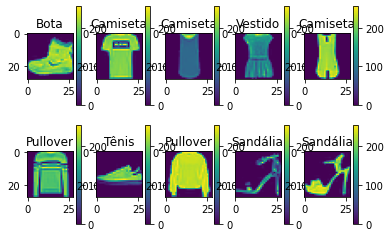

In [9]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
    plt.colorbar()

# Normalizando as imagens

In [10]:
imagens_treino = imagens_treino/float(255)

# Criando, compilando, treinando e normalizando o modelo

In [56]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])
callbacks = [
                keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',  monitor='val_loss', save_best_only=True)
            ]
adam = keras.optimizers.Adam(lr=0.002)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


historico = modelo.fit(
    imagens_treino, 
    identificacoes_treino, 
    batch_size = None, 
    epochs=5, 
    validation_split=0.2,
    callbacks = callbacks)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 7s 5ms/step - loss: 0.5220 - accuracy: 0.8120 - val_loss: 0.4232 - val_accuracy: 0.8457
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4128 - accuracy: 0.8482 - val_loss: 0.3915 - val_accuracy: 0.8537


## Resumo do modelo

In [12]:
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Pesos da primeira camada dense

In [25]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.06665657,  0.08702638,  0.08218083, ..., -0.03945239,
         0.07998051,  0.05121087],
       [ 0.06503488,  0.00182441, -0.00549513, ..., -0.10643879,
        -0.02898683,  0.06418736],
       [-0.2557048 , -0.20155469, -0.05865427, ..., -0.09288914,
         0.16905493, -0.00355391],
       ...,
       [-0.15238515, -0.01487902, -0.05701625, ...,  0.00626245,
        -0.21913743,  0.00920754],
       [-0.11689798,  0.12726018,  0.10232242, ...,  0.0466113 ,
        -0.09863809, -0.03951865],
       [ 0.02810724, -0.04401531,  0.08111231, ...,  0.02867253,
        -0.07991988,  0.03102371]], dtype=float32)

In [44]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.4270 - accuracy: 0.1001 - val_loss: 2.3265 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3091 - accuracy: 0.1001 - val_loss: 2.3034 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.0983


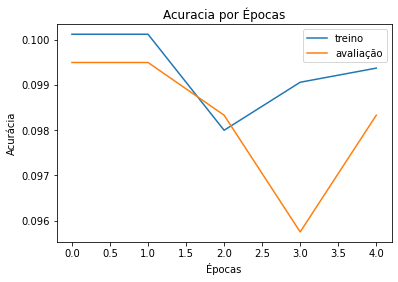

In [45]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'avaliação'])

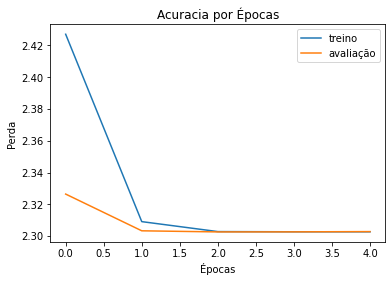

In [46]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acuracia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino', 'avaliação'])

In [26]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-7.05414861e-02, -3.41848046e-01, -7.86656067e-02,  4.02383395e-02,
        3.12733501e-01, -8.28176551e-03,  2.54739791e-01,  7.10293874e-02,
        8.04370865e-02, -1.63936857e-02,  1.40777626e-03,  2.53498822e-01,
        1.46444082e-01, -1.99183729e-02,  1.83194101e-01, -1.07943721e-01,
        1.87664866e-01,  6.56581372e-02,  8.47833753e-02,  2.66465068e-01,
        2.11595111e-02, -2.03742027e-01,  3.18578243e-01, -1.12740798e-02,
        1.76243559e-01,  3.10066611e-01, -2.02409029e-01, -5.03432378e-03,
        1.68954805e-01, -1.83331370e-01,  2.31208950e-01,  2.63238490e-01,
       -1.88960567e-01, -2.39788353e-01, -1.88678987e-02, -8.57822001e-02,
        4.29844623e-03,  3.16354968e-02, -1.50455445e-01, -3.26030850e-02,
        3.09671819e-01,  7.40075717e-03,  1.19359307e-01,  2.77456135e-01,
       -2.04513017e-02,  2.79322773e-01,  2.05534890e-01,  3.96663845e-02,
       -1.44084543e-02,  1.31434962e-01,  2.73809344e-01,  2.83246666e-01,
       -7.10948184e-02,  

In [27]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

# Salvando e carregando o modelo treinado

In [37]:
pesos_camada_dense_aleatorios = np.random.rand(784,256)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])
modelo.layers[1].get_weights()[0]

array([[0.76965034, 0.04847366, 0.3740385 , ..., 0.46737674, 0.90266097,
        0.6141753 ],
       [0.8859596 , 0.24911684, 0.05925223, ..., 0.72819585, 0.43096867,
        0.20779301],
       [0.94003373, 0.22841974, 0.26881722, ..., 0.31269777, 0.97186005,
        0.40164772],
       ...,
       [0.69024086, 0.04938871, 0.51907796, ..., 0.34288397, 0.7111328 ,
        0.75316936],
       [0.72261167, 0.42723998, 0.5687722 , ..., 0.61720014, 0.5242174 ,
        0.19146511],
       [0.49545538, 0.5911547 , 0.8210712 , ..., 0.66655517, 0.2348801 ,
        0.68046594]], dtype=float32)

In [14]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por Época

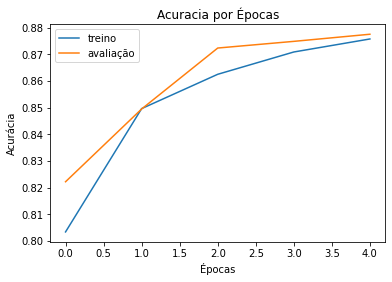

In [32]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'avaliação'])

# Visualizando as perdas de treino e validação por Época

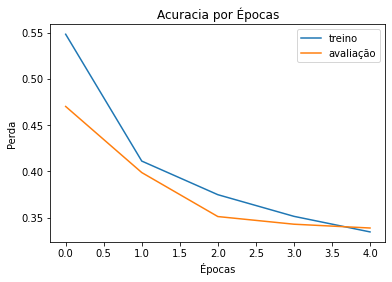

In [33]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Acuracia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino', 'avaliação'])

# Testando o modelo e o modelo salvo

In [17]:
testes = modelo.predict(imagens_teste)
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

In [18]:
print(f'Resultado do teste: {np.argmax(testes[2])}')
print(f'Número da imagem de teste: {identificacoes_teste[2]}')

Resultado do teste: 1
Número da imagem de teste: 1


# Avaliando os modelos

In [19]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
perda_teste_salvo, acuracia_teste_salvo = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 2ms/step - loss: 51.6792 - accuracy: 0.8584


In [20]:
print(f'Perda do teste: {perda_teste:.2f}')
print(f'Acurácia do teste: {acuracia_teste:.2f}')
print(f'Perda do teste salvo: {perda_teste_salvo:.2f}')
print(f'Acurácia do teste salvo: {acuracia_teste_salvo:.2f}')

Perda do teste: 51.68
Acurácia do teste: 0.86
Perda do teste salvo: 51.68
Acurácia do teste salvo: 0.86
